Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras import layers
from keras.utils import to_categorical

# Test to load and Resize file

In [2]:
# New size of picture
p = 64

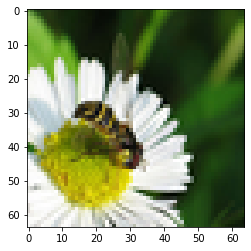

In [3]:
img = load_img('D:/PIAIC AI Course March 2020/Q2/deeplearning assigment/flowers/daisy/5547758_eea9edfd54_n.jpg')
img = img.resize((p, p), Image.ANTIALIAS)
img_array = img_to_array(img)
plt.imshow(img)

# Load Pictures and Convert to array and make a Single X(Pixels) and Y(Lables) dataset

In [4]:
# ----------------   0          1         2         3           4 
classification = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [5]:
path = 'D:/PIAIC AI Course March 2020/Q2/deeplearning assigment/flowers/'

In [6]:
length_daisy = len(os.listdir(path+'daisy'))
length_dandelion = len(os.listdir(path+'dandelion'))
length_rose = len(os.listdir(path+'rose'))
length_sunflower = len(os.listdir(path+'sunflower'))
length_tulip = len(os.listdir(path+'tulip'))

In [7]:
print(length_daisy)
print(length_dandelion)
print(length_rose)
print(length_sunflower)
print(length_tulip)

769
1052
784
734
984


In [8]:
length_x = length_daisy + length_dandelion + length_rose + length_sunflower + length_tulip
length_x

4323

In [9]:
x = np.zeros((length_x,p,p,3))
x.shape

(4323, 64, 64, 3)

In [10]:
y = np.zeros((length_x,1))
y.shape

(4323, 1)

### Load daisy pictures

In [11]:
z = 0   #Counter for image file loading 
d = 0   #Counter for array append for different flowers
for i in os.listdir(path+'daisy'):
    img = load_img(path+'daisy/'+os.listdir(path+'daisy')[z])
    img = img.resize((p, p), Image.ANTIALIAS)
    img_array = img_to_array(img)
    x[d] = img_array
    y[d] = 0
    
    z += 1
    d += 1
d

769

### Load dandelion pictures

In [12]:
z = 0   #Counter for image file loading 
d = 769   #Counter for array append for different flowers
for i in os.listdir(path+'dandelion'):
    img = load_img(path+'dandelion/'+os.listdir(path+'dandelion')[z])
    img = img.resize((p, p), Image.ANTIALIAS)
    img_array = img_to_array(img)
    x[d] = img_array
    y[d] = 1
    
    z += 1
    d += 1
d

1821

### Load rose pictures

In [13]:
z = 0   #Counter for image file loading 
d = 1821   #Counter for array append for different flowers
for i in os.listdir(path+'rose'):
    img = load_img(path+'rose/'+os.listdir(path+'rose')[z])
    img = img.resize((p, p), Image.ANTIALIAS)
    img_array = img_to_array(img)
    x[d] = img_array
    y[d] = 2
    
    z += 1
    d += 1
d

2605

### Load sunflower pictures

In [14]:
z = 0   #Counter for image file loading 
d = 2605   #Counter for array append for different flowers
for i in os.listdir(path+'sunflower'):
    img = load_img(path+'sunflower/'+os.listdir(path+'sunflower')[z])
    img = img.resize((p, p), Image.ANTIALIAS)
    img_array = img_to_array(img)
    x[d] = img_array
    y[d] = 3
    
    z += 1
    d += 1
d

3339

### Load tulip pictures

In [15]:
z = 0   #Counter for image file loading 
d = 3339   #Counter for array append for different flowers
for i in os.listdir(path+'tulip'):
    img = load_img(path+'tulip/'+os.listdir(path+'tulip')[z])
    img = img.resize((p, p), Image.ANTIALIAS)
    img_array = img_to_array(img)
    x[d] = img_array
    y[d] = 4
    
    z += 1
    d += 1
d

4323

In [16]:
print(x.shape)
print(y.shape)

(4323, 64, 64, 3)
(4323, 1)


# Split Data into Train, Test and Validation

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Split to 60% Train and 40% Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2593, 64, 64, 3)
(1730, 64, 64, 3)
(2593, 1)
(1730, 1)


# One Hot encoding of Labels

In [20]:
# Convert the labels into a set of 5 numbers to input into NN
# Every set of rows will have 5 values, all 0 except the one with actual label index will be 1
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [21]:
y_train_one_hot[0]

array([0., 0., 0., 1., 0.], dtype=float32)

In [22]:
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(2593, 5)
(1730, 5)


# Normalize pixel values between 0 and 1

In [23]:
x_train = x_train /255
x_test = x_test /255

# Create Model

In [24]:
model = Sequential()

# First Layer (32 5x5 relu convoluted feature maps)
model.add(Conv2D(32, (5,5) , activation = 'relu', input_shape=(p,p,3)))

# 2nd Layer as pooling Layer (creating a pooling layer with 2x2 pixel filter)
model.add(MaxPooling2D(pool_size = (2,2)))

# 3rd Layer (2nd Colvolution Layer)
model.add(Conv2D(32, (5,5) , activation = 'relu'))

# 4th Layer (2nd Pooling Layer)
model.add(MaxPooling2D(pool_size = (2,2)))

# 5th Layer (Flattening Layer)
model.add(Flatten())

# 6th Layer with 1000 neurons to feed from previous layers
model.add(Dense(1000, activation = 'relu'))

# 7th Layer (Dropout layer with 50%)
model.add(Dropout(0.5))

# 8th Layer with 500 neurons to feed from previous layers
model.add(Dense(500, activation = 'relu'))

# 9th Layer (Dropout layer with 50%)
model.add(Dropout(0.5))

# 10th Layer with 250 neurons to feed from previous layers
model.add(Dense(250, activation = 'relu'))

# 11th Layer with 5 neurons (as there are 10 different Classifications)
model.add(Dense(5, activation = 'softmax'))

In [25]:
# Compile the Model

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy']
             )

In [26]:
# Train the Model with Validation Data of 20%

hist = model.fit(x_train, y_train_one_hot, epochs = 15, batch_size = 256,
                validation_split = 0.2)

Epoch 1/15
9/9 [==============================] - 9s 985ms/step - loss: 1.6242 - accuracy: 0.2428 - val_loss: 1.4579 - val_accuracy: 0.3449
Epoch 2/15
9/9 [==============================] - 7s 772ms/step - loss: 1.3984 - accuracy: 0.3622 - val_loss: 1.3711 - val_accuracy: 0.3796
Epoch 3/15
9/9 [==============================] - 7s 827ms/step - loss: 1.3568 - accuracy: 0.3782 - val_loss: 1.2269 - val_accuracy: 0.4759
Epoch 4/15
9/9 [==============================] - 7s 785ms/step - loss: 1.3095 - accuracy: 0.4224 - val_loss: 1.1754 - val_accuracy: 0.4894
Epoch 5/15
9/9 [==============================] - 8s 847ms/step - loss: 1.2174 - accuracy: 0.4694 - val_loss: 1.1286 - val_accuracy: 0.5299
Epoch 6/15
9/9 [==============================] - 8s 852ms/step - loss: 1.1993 - accuracy: 0.4910 - val_loss: 1.2185 - val_accuracy: 0.4355
Epoch 7/15
9/9 [==============================] - 7s 802ms/step - loss: 1.1832 - accuracy: 0.5091 - val_loss: 1.1171 - val_accuracy: 0.5222
Epoch 8/15
9/9 [====

# Check Accuracy of Model based on Test Data

In [27]:
model.evaluate(x_test, y_test_one_hot)[1]

55/55 [==============================] - 2s 31ms/step - loss: 1.0782 - accuracy: 0.5913


0.5913294553756714

# Check Model's Loss and Accuracy against Validation Data

In [28]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

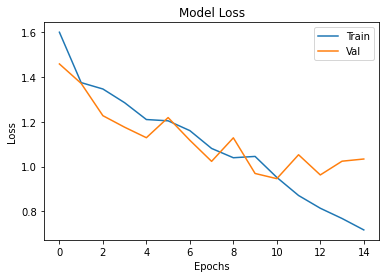

In [29]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

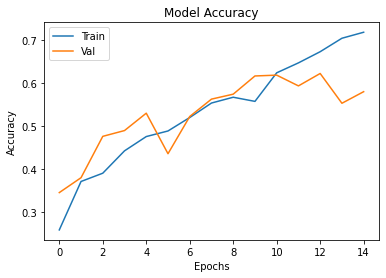

In [30]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# Test the Model with random images online

### Test Image 1

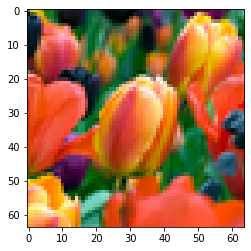

In [104]:
img = load_img('tulip.jpeg')
img = img.resize((p, p), Image.ANTIALIAS)
plt.imshow(img)

In [105]:
img_array = img_to_array(img)

In [106]:
img_array.shape

(64, 64, 3)

In [107]:
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 64, 64, 3)

In [108]:
predictions = model.predict(img_array)
predictions

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [109]:
# Sort predictions from least to Greatest
list_index = [0,1,2,3,4]
x = predictions

for i in range(5):
    for j in range(5):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
# Show the sorted labels in order
print(list_index)

[4, 1, 2, 3, 0]


In [110]:
for i in range(5):
    print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100,2), '%' )

tulip : 100.0 %
dandelion : 0.0 %
rose : 0.0 %
sunflower : 0.0 %
daisy : 0.0 %


### Test Image 2

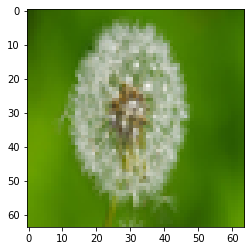

In [82]:
img = load_img('Dandelion2.jpg')
img = img.resize((p, p), Image.ANTIALIAS)
plt.imshow(img)

In [83]:
img_array = img_to_array(img)

In [84]:
img_array.shape

(64, 64, 3)

In [85]:
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 64, 64, 3)

In [86]:
predictions = model.predict(img_array)
predictions

array([[5.911991e-20, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00]], dtype=float32)

In [87]:
# Sort predictions from least to Greatest
list_index = [0,1,2,3,4]
x = predictions

for i in range(5):
    for j in range(5):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
# Show the sorted labels in order
print(list_index)

[1, 0, 2, 3, 4]


In [88]:
for i in range(5):
    print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100,2), '%' )

dandelion : 100.0 %
daisy : 0.0 %
rose : 0.0 %
sunflower : 0.0 %
tulip : 0.0 %


### Test Image 3

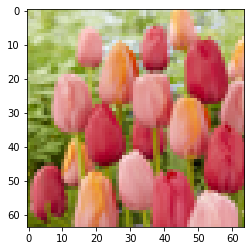

In [97]:
img = load_img('tulip2.jpg')
img = img.resize((p, p), Image.ANTIALIAS)
plt.imshow(img)

In [98]:
img_array = img_to_array(img)

In [99]:
img_array.shape

(64, 64, 3)

In [100]:
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 64, 64, 3)

In [101]:
predictions = model.predict(img_array)
predictions

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [102]:
# Sort predictions from least to Greatest
list_index = [0,1,2,3,4]
x = predictions

for i in range(5):
    for j in range(5):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
# Show the sorted labels in order
print(list_index)

[4, 1, 2, 3, 0]


In [103]:
for i in range(5):
    print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100,2), '%' )

tulip : 100.0 %
dandelion : 0.0 %
rose : 0.0 %
sunflower : 0.0 %
daisy : 0.0 %
